Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.ndimage import measurements # Check this

%matplotlib inline

## Standard Percolation

Simulate percolation on a 2D lattice

In [36]:
L = 100 # Size of the lattice
p = 0.5927 # Probability of conducting site
r = np.random.rand(L,L) # Lattice of random numbers from standard uniform distribution
m = r < p # Create boleran for conducting sites in the lattice
lw, num = measurements.label(m) # Find and organize clusters. 'num' is the total number of connectivity clusters

Print the lattice with each cluster numbered

In [25]:
print(lw)

[[ 1  1  1  0  0  0  0  2  2  0  3  0  0  4  4  4  0  5  5  5]
 [ 1  1  1  0  0  0  2  2  0  3  3  0  2  0  0  0  5  5  5  0]
 [ 1  1  0  2  2  2  2  2  0  3  0  0  2  0  2  0  0  5  5  5]
 [ 1  0  0  0  2  0  2  2  2  0  2  2  2  2  2  0  0  5  5  0]
 [ 0  2  2  2  2  2  0  2  2  2  2  2  2  2  2  2  2  0  5  5]
 [ 2  0  2  2  2  2  2  2  2  0  2  0  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  2  2  2  0  2  2  2  2  0  6  0  0  7  7  7]
 [ 2  0  2  0  0  2  2  0  0  2  2  2  2  2  0  0  0  0  7  7]
 [ 2  2  2  0  2  2  2  2  0  2  2  2  0  2  2  2  0  8  0  0]
 [ 2  2  2  2  2  2  2  0  2  2  0  0  2  2  2  2  0  0  0  9]
 [ 2  2  2  0  0  2  2  0  2  2  2  2  2  2  2  0  0 10  0  9]
 [ 2  2  0  0 11  0  2  2  2  0  0  0  0  0  0  0  0 10 10  0]
 [ 2  0  0  0  0  0  2  2  2  0 12 12 12  0  0 13  0 10  0  0]
 [ 2  0 14  0  2  2  2  2  2  2  0 12  0 15  0  0 16  0  0  0]
 [ 0  0  0  2  0  2  0  0  0  0  0  0 15 15 15 15  0  0 17 17]
 [ 0 18  0  2  2  2  0  0  0  0  0 19  0 15 15 15 15 15

Print the total number of clusters

In [26]:
print('The total number of clusters is ' + str(num))

The total number of clusters is 25


Compute the size of each cluster

In [37]:
area = measurements.sum(m, lw, index= np.arange(lw.max() + 1)) # This calculates the size of all the clusters, sorted from the smallest to the largest
areaImg = area[lw] # Compute the lattice, with the number equal to the cluster size for each cluster

In [34]:
# print(area[lw]) # Print if in doubt

Plot the results

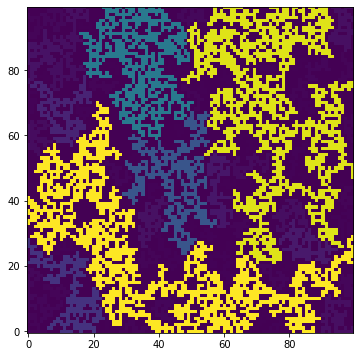

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(areaImg, origin='lower')
# fig.colorbar(ax.imshow(areaImg, origin='lower'));
plt.show()

Simulate the system for different values of $p$

In [39]:
p_vals = np.linspace(0.5,0.7,100)
L = 100
nsamp = 100
r = np.random.rand(L,L) # Only need to generate the lattice once. This is a quick way to simulate
n_perc = np.zeros(len(p_vals))

# Loop over p values
for i,p in enumerate(p_vals):
    
    # Repeat calculations below as many times as the number of samples
    for j in range(nsamp):
        
        # Compute percolation
        r = np.random.rand(L,L) # Random numbers are drawn again (changes results a bit)
        m = r<p
        lw, num = measurements.label(m)

        # Loop over each of the clusters
        # If the cluster spans the entire lattice horizontally, it is the infinity cluster
        # Then count the number of times the infinity cluster appears and divide by nr of samples to compute frequency
        for n in range(1,num+1):
            if n in lw[0,:] and n in lw[L-1,:]: # Check for vertical spans
                n_perc[i] += 1

# Compute the percolation probability as the sample average
p_perc = n_perc/nsamp

Plot the resulting percolation probability as a function of the conducting probability. This is just $p_c = 0.5$ in the case of the Bethe lattice, but must be computed numerically for a finite-dimensional lattice. Define the critical probability as the $p$ that ensures $P(p) = 0.5$. The idea is that if the percolation probability is $0.5$, then for a infinitely large system, 

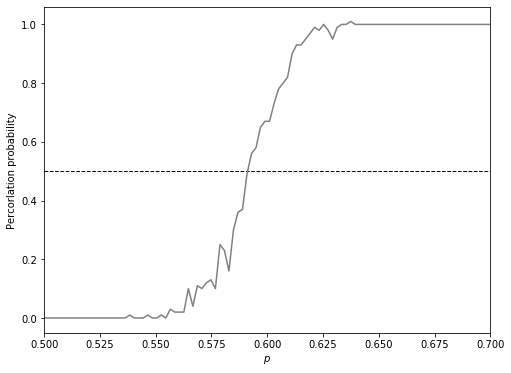

In [61]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.plot(p_vals, p_perc, linestyle = '-', color = '0.5')
ax.set_xlabel('$p$')
ax.set_ylabel('Percorlation probability')
ax.hlines(y = 0.5, color= 'k', linestyle = '--', linewidth=1, xmin = 0.5, xmax = 0.7)
ax.set_xlim(0.5,0.7)

plt.show()

## Directed Percolation